The following notebook showcases some common practices to inspect the quality of your road-network graph, and possibilities to improve it.

In [10]:
import os, sys
import time
import networkx as nx
import osmnx as ox

In [11]:
# add to your system path the location of the LoadOSM.py and GOSTnet.py scripts
sys.path.append("../")
import GOSTnets as gn

In [13]:
pth = "./" # change this path to your working folder
data_pth = os.path.join(pth, 'tutorial_outputs')

# read back your graph from step 1 from you saved pickle
G = nx.read_gpickle(os.path.join(data_pth, 'iceland_network_clean.pickle'))

In [14]:
# note the use of sorted to sort by number of edges
list_of_subgraphs = [G.subgraph(c).copy() for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]

In [15]:
G_largest = list_of_subgraphs[0]
G_second_largest = list_of_subgraphs[1]

In [16]:
print(nx.info(G_largest))

Name: 
Type: MultiDiGraph
Number of nodes: 9583
Number of edges: 24491
Average in degree:   2.5557
Average out degree:   2.5557


In [17]:
print(nx.info(G_second_largest))

Name: 
Type: MultiDiGraph
Number of nodes: 16
Number of edges: 30
Average in degree:   1.8750
Average out degree:   1.8750


In [18]:
print(nx.info(list_of_subgraphs[2]))

Name: 
Type: MultiDiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667


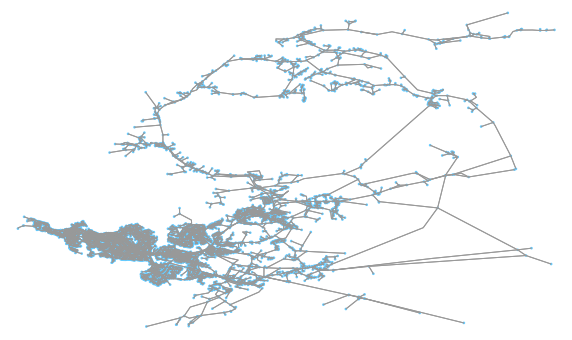

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2e82e9afe10>)

In [19]:
# plotting functions only work if the graphs have a name and a crs attribute
G_largest.graph['crs'] = 'epsg:32646'
G_largest.graph['name'] = 'Iceland'

# largest connected subgraph
ox.plot_graph(G_largest, fig_width=10, edge_linewidth=1, node_size=7)

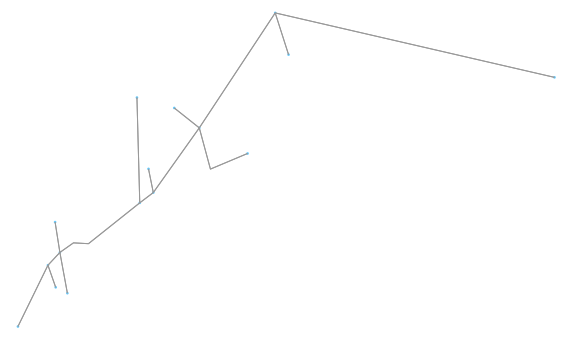

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2e82ed73128>)

In [20]:
G_second_largest.graph['crs'] = 'epsg:32646'
G_second_largest.graph['name'] = 'Iceland'

# second largest connected subgraph
ox.plot_graph(G_second_largest, fig_width=10, edge_linewidth=1, node_size=7)

In [21]:
edges_largest = gn.edge_gdf_from_graph(G_largest)
edges_largest.to_csv(os.path.join(data_pth, 'edges_largest.csv'))

C:\WBG\Anaconda\envs\network-analysis\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [22]:
edges_second = gn.edge_gdf_from_graph(G_second_largest)
edges_second.to_csv(os.path.join(data_pth, 'edges_second.csv'))

The next step would be to inspect changes in QGIS, add new paths to improve connectivity, and re-run the graph import notebooks to produce a better connected graph.